# Ice Cream Project

Logistic regression and Feature selection

Ice Cream Analysis- can we model the maximization of 5-star reviews given the ingredient components?

Sources:

- [Using LASSO for variable selection, then using Logit (stackexchange)](https://stats.stackexchange.com/questions/135067/using-lasso-for-variable-selection-then-using-logit)
- [How to perform logistic lasso in python? (stackoverflow)](https://stackoverflow.com/questions/41639557/how-to-perform-logistic-lasso-in-python)
-[Feature Selection Using Regularisation](https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499)
-Lasso Regularization explained (video below):

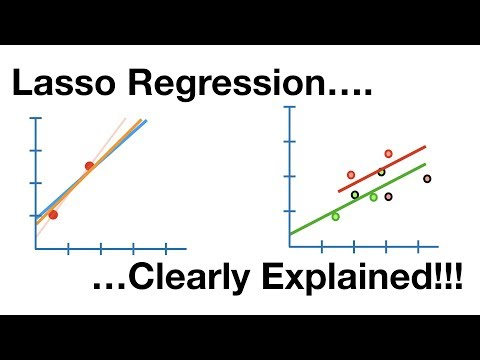

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('NGf0voTMlcs')

### Data prep

In [3]:
#imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [4]:
#load data

#flavor/topping indicators
url =  'https://raw.githubusercontent.com/emi90/icecream/main/reviews_with_dummies.csv'

#indicators for ALL ingredients
url_all = 'https://raw.githubusercontent.com/emi90/icecream/main/reviews_indicators.csv'

df = pd.read_csv(url)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
#Find the non-indicator columns (the decriptive columns from the original reviews dataset)

df.columns[0:25]

Index(['Unnamed: 0', 'ingredients.1', 'Flavor', 'brand', 'key', 'author',
       'date', 'stars', 'title', 'helpful_yes', 'helpful_no', 'text', 'taste',
       'ingredients', 'texture', 'likes', 'banana', 'blackberry..mascarpone',
       'blueberry..respberry', 'bourbon', 'bourbon..vanilla', 'brown.sugar',
       'butter.pecan', 'butterscotch', 'caramel'],
      dtype='object')

In [23]:
#drop the descriptive columns

drop_cols = ["Unnamed: 0", "ingredients.1","Flavor","brand","key",
    "author","date","stars","title","helpful_yes","helpful_no",
    "text","taste","ingredients","texture","likes", "name"]

df_indicators = df.drop(columns = drop_cols, axis = 1)

df_indicators.shape

(21674, 95)

In [7]:
#verify that dataset contains just indicator/numerical values

is_num_df = pd.DataFrame(data = df_indicators.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all()))
is_num_df.loc[is_num_df[0] == False]

,0


In [8]:
#load training and test dataset

X_train, X_test, y_train, y_test = train_test_split(
    df_indicators.drop(columns = ["is_5"], axis = 1),
    df_indicators["is_5"],
    test_size = 0.3,
    random_state = 0)

X_train.shape, X_test.shape

((15171, 94), (6503, 94))

In [9]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty = "l1", solver = 'liblinear'))
sel_.fit(X_train.fillna(0), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [10]:
sel_.get_support()

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True])

In [11]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 94
selected features: 84
features with coefficients shrank to zero: 10


In [12]:
selected_feat

Index(['blackberry..mascarpone', 'blueberry..respberry', 'bourbon',
       'bourbon..vanilla', 'brown.sugar', 'butter.pecan', 'caramel',
       'caramel..chocolate', 'caramel..dulce.de.leche..vanilla',
       'caramel..mocha', 'caramel..vanilla', 'cheescake', 'cherry',
       'chocolate', 'chocolate..cheescake', 'chocolate..mint',
       'chocolate..peanut.butter', 'chocolate..peppermint',
       'chocolate..strawberry..vanilla', 'chocolate..vanilla', 'cinammon',
       'coconut', 'coconut..chocolate', 'coffee', 'coffee..sweet.cream',
       'coffee..vanilla', 'dulce.de.leche', 'eggnog', 'green.tea', 'hazelnut',
       'honey', 'irish.cream', 'key.lime', 'lemon', 'lemon..raspberry',
       'marshmallow', 'mint', 'orange..vanilla', 'peach', 'peanut.butter',
       'peanut.butter..vanilla', 'peppermint', 'pineapple..coconut',
       'pistachio', 'pistachio..sweet.cream', 'pumpkin', 'raspberry',
       'rosÃ.Â.Â.', 'rum', 'strawberry', 'sweet.cream', 'toffee', 'vanilla',
       'vanilla..

In [13]:
col_list_all = list(X_train.columns)
col_list_selected = list(selected_feat)
not_selected = [col for col in col_list_all if col not in col_list_selected]

In [14]:
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))

X_train_selected.shape, X_test_selected.shape

((15171, 84), (6503, 84))

In [84]:
#Drop the indicator variables whose coefficients are shrunk to 0

selected_df = df.drop(columns = not_selected, axis = 1)
#selected_df.to_csv('lasso.csv')

### Checking for multicollinearity

In [74]:
#Prepare correlation matrix

ind_cols = drop_cols
ind_cols.append("is_5")

ind_df = selected_df.drop(columns = ind_cols, axis = 1)

corr_df = ind_df.corr()

In [86]:
corr_level = 0.7

corr_dict = {}
cols_list = list(ind_df.columns)

for i in range(len(corr_df)):
    col_name = cols_list[i]
    bool_ser = corr_df[col_name] >= corr_level
    corr_item = list(bool_ser.index[bool_ser]) #get the element where correlation == corr_level
    if len(corr_item) > 1: #other correlated item?
        corr_dict[col_name] = corr_item

corr_dict

{'pineapple..coconut': ['pineapple..coconut', 'contains_pineapple'],
 'raspberry': ['raspberry', 'contains_raspberries'],
 'strawberry': ['strawberry', 'contains_strawberries'],
 'contains_pineapple': ['pineapple..coconut', 'contains_pineapple'],
 'contains_strawberries': ['strawberry', 'contains_strawberries'],
 'contains_raspberries': ['raspberry', 'contains_raspberries']}

Flavor indicator for Pineapple seems to only exist for Ice Creams that "contain_pineapple", so this additional indicator is duplicate. 

In [79]:
# Check flavors for contains_pineapple


selected_df.loc[selected_df.contains_pineapple == 1]["Flavor"].unique()

array(['pineapple, coconut'], dtype=object)

In [80]:
# Check flavors for contains_raspberries


selected_df.loc[selected_df.contains_raspberries == 1]["Flavor"].unique()

array(['blueberry, respberry', 'white chocolate, raspberry',
       'lemon, raspberry', 'raspberry', 'white chocolate', 'cheescake'],
      dtype=object)

In [81]:
# Check flavors for contains_strawberries


selected_df.loc[selected_df.contains_strawberries == 1]["Flavor"].unique()

array(['blueberry, respberry', 'strawberry',
       'chocolate, strawberry, vanilla', 'cheescake'], dtype=object)

Pineapple flavor and Contains_Pineapple is duplicate, so we will drop this column

In [85]:
selected_df_2 = selected_df.drop(columns = ["contains_pineapple"], axis = 1)

selected_df_2.to_csv('lasso.csv')